# Trayectorias circular, elípticas, parabólicas e hiperbólicas

*(si no tienes Python y/o Jupyter instalado localmente, considera usar Google Colab para ejecutar este cuadernillo; una cuenta Google Drive puede ser necesaria)* <a href="https://colab.research.google.com/github/djmunoz/cursos-fisica-2/blob/main/trajectories.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Preliminares: Instalación de librerias
Probablemente, necesitaras instalar el paquete <code>rebound</code>. Si es así, descomenta la siguiente celda:

In [1]:
# %pip install rebound

### 1. Cargar librerías relevantes

In [2]:
import rebound
import numpy as np
import matplotlib.pyplot as plt
from IPython import display
import time

### 2. Inicializar simulación (creación del objeto <code>sim</code>)

In [3]:
sim = rebound.Simulation()
sim.G = 39.4876393
sim.integrator = "whfast"
au = 1.
Msun = 1.

### 3. Nave espacial alrededor del Sol

In [4]:
alpha = 1
r0 = 1 * au
v0 = alpha * np.sqrt(sim.G * Msun/r0)


# r0 es una lista de 10 vectores de posición (x,y,z), i.e , una matriz 10x3
pos0=np.array([[0,0,0],[0,r0,0]])
vel0=np.array([[0,0,0],[v0,0,0]])
masses = np.array([Msun,1e-30])


### 4. Inicializar la simulación computacional, agregando cada cuerpo a objeto <code>sim</code>

In [5]:
for kk in range(len(masses)):
    sim.add(m=masses[kk],x=pos0[kk,0],y=pos0[kk,1],z=pos0[kk,2],vx=vel0[kk,0],vy=vel0[kk,1],vz=vel0[kk,2])
#...y nos aseguramos que el centro de masa está en reposo en el origen
sim.move_to_com()

### 5. Integración numérica en el tiempo

In [6]:
#%matplotlib notebook  

tmax = 2
Nout = 100
x,y = np.zeros(Nout), np.zeros(Nout)
times = np.linspace(0.,tmax,Nout)

for i,t in enumerate(times):
    sim.integrate(t)
    x[i], y[i] = sim.particles[1].x, sim.particles[1].y
    #plt.plot(x[::i+1],y[::i+1])
    #plt.axis('equal')

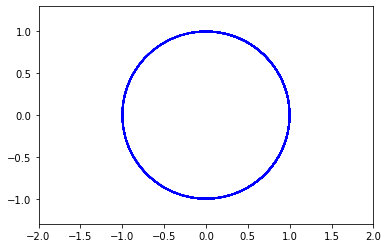

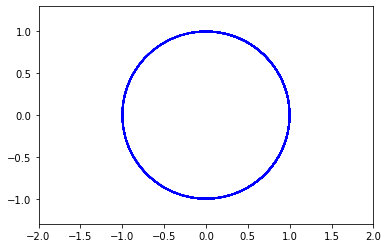

In [11]:
%matplotlib inline

for i,t in enumerate(times):
    plt.plot(x[:i+1],y[:i+1],'k',lw=0.8)
    plt.plot(x[i],y[i],'b.')
    plt.axis('equal')
    plt.xlim(-2*au,2*au)
    plt.ylim(-2*au,2*au)
    display.clear_output(wait=True)
    display.display(plt.gcf())
    time.sleep(0.05)

### 6. Graficar solución en coordenadas baricéntricas (i.e., respecto al centro de masa)

In [ ]:
%matplotlib inline
plt.plot(x,y,'.')
plt.xlim(-2*au,2*au)
plt.ylim(-2*au,2*au)
plt.axis('equal')
plt.show()
print(x,y)